<span style="font-size:large;">
<div style="text-align: right">CSTS-UH 1078 <b>Networks</b><br/>
Faculty: <b>Moses Boudourides</b><br/>
Fall Semester 2019<br/>
New York University Abu Dhabi</div>

## <span style="color:red">EXPERIMENT 14</span>
# <span style="color:green">Data and Network Analysis of Twitter Datasets

In [1]:
import math, twitter, re, string, copy, itertools, pickle, datetime, pandas as pd, numpy as np, matplotlib.pyplot as plt, networkx as nx
from collections import Counter, OrderedDict
import operator
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# from nltk import bigrams 
import os
os.chdir("/Volumes/LaCie/WorkPlaces/Python Projects 2/2 NYUAD Networks/CourseNotebooks/Utilities/TwitterUtils/")
import tools as tool
# import community
from wordcloud import WordCloud
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout

#### Loading the Dataframe

In [2]:
st="Climate Change"
gname=st
stc=st.replace(" ","")
plname1=stc+"_df.pic" 
mt = pd.read_pickle(plname1)
mt=mt.drop(mt[mt.twitter_id==1094622889054212096].index)
mt=mt.drop(mt[mt.twitter_id==1094416919288037376].index)
mt=mt.drop(mt[mt.twitter_id==1094744351803170816].index)
mt=mt.sort_values(by='created_at')
mt.head()

,twitter_id,created_at,screen_name,hashtags_list,mentions_list,lang,text,date
17818,1094829732741500929,Mon Feb 11 05:25:23 +0000 2019,dailymorgasm,NaN,"[amyklobuchar, realDonaldTrump]",en,"RT @amyklobuchar: Science is on my side, @real...",2019-02-11 05:25:23
17819,1094829732678549504,Mon Feb 11 05:25:23 +0000 2019,CVictorsen,NaN,[RBReich],en,RT @RBReich: The 3 biggest threats to our surv...,2019-02-11 05:25:23
17820,1094829731311177728,Mon Feb 11 05:25:23 +0000 2019,darksideofcode,NaN,NaN,en,"As the Planet Warms, Who Should Get to Drive? ...",2019-02-11 05:25:23
17817,1094829734461169664,Mon Feb 11 05:25:24 +0000 2019,NewsOfMideast,NaN,[RBReich],en,RT @RBReich: The 3 biggest threats to our surv...,2019-02-11 05:25:24
17815,1094829739338944512,Mon Feb 11 05:25:25 +0000 2019,SistahSHE,NaN,NaN,en,Of course corrupt Con-man Trump denies Climate...,2019-02-11 05:25:25


In [3]:
lh=[]
for i in mt["hashtags_list"].tolist():
    if type(i)==list: #!=float:
        t=[]
        for ii in i:
            ii=ii.lower()
            t.append(ii)
        lh.append(t)
    else:
        lh.append([])
lh
mt["hashtags_list"]=lh
# mt #.head()
evd=mt['created_at']
evd=pd.to_datetime(evd)
mt['date']=evd
mt=mt.sort_values(by="date")
mt

,twitter_id,created_at,screen_name,hashtags_list,mentions_list,lang,text,date
17818,1094829732741500929,Mon Feb 11 05:25:23 +0000 2019,dailymorgasm,[],"[amyklobuchar, realDonaldTrump]",en,"RT @amyklobuchar: Science is on my side, @real...",2019-02-11 05:25:23
17819,1094829732678549504,Mon Feb 11 05:25:23 +0000 2019,CVictorsen,[],[RBReich],en,RT @RBReich: The 3 biggest threats to our surv...,2019-02-11 05:25:23
17820,1094829731311177728,Mon Feb 11 05:25:23 +0000 2019,darksideofcode,[],NaN,en,"As the Planet Warms, Who Should Get to Drive? ...",2019-02-11 05:25:23
17817,1094829734461169664,Mon Feb 11 05:25:24 +0000 2019,NewsOfMideast,[],[RBReich],en,RT @RBReich: The 3 biggest threats to our surv...,2019-02-11 05:25:24
17815,1094829739338944512,Mon Feb 11 05:25:25 +0000 2019,SistahSHE,[],NaN,en,Of course corrupt Con-man Trump denies Climate...,2019-02-11 05:25:25
17816,1094829738479124480,Mon Feb 11 05:25:25 +0000 2019,trudyg007,[],[Scottludlam],en,RT @Scottludlam: put down the dildo and do som...,2019-02-11 05:25:25
17814,1094829742421766144,Mon Feb 11 05:25:26 +0000 2019,cestquica,[],[RBReich],en,RT @RBReich: The 3 biggest threats to our surv...,2019-02-11 05:25:26
17811,1094829748604280832,Mon Feb 11 05:25:27 +0000 2019,kharal_saif,[],[PTIofficial],en,RT @PTIofficial: You only lose when you give u...,2019-02-11 05:25:27
17813,1094829745798348800,Mon Feb 11 05:25:27 +0000 2019,newsycbot,[],NaN,en,"As the Planet Warms, Who Should Get to Drive? ...",2019-02-11 05:25:27
17812,1094829747316523008,Mon Feb 11 05:25:27 +0000 2019,MekongEye,[],NaN,en,Navigating coverage of climate change and agri...,2019-02-11 05:25:27


In [4]:
mind=mt.date.min().strftime("%d-%m-%Y %H:%M:%S")
maxd=mt.date.max().strftime("%d-%m-%Y %H:%M:%S")
# print mind
# print maxd
print "The", st, "dataframe contains", len(mt), "tweets", "from", mind, "to", maxd

The Climate Change dataframe contains 20014 tweets from 11-02-2019 05:25:23 to 11-02-2019 11:15:09


## 1. Counting Tweets, Tweeple, Hashtags and Mentions

In [5]:
def flis(list):
    return [i for sl in list for i in sl]

In [6]:
list=[mt["hashtags_list"].tolist()[i] for i in range(len(mt))]
hashtags=set(flis(list))
print "Totally there are %i hashtags in %i tweets" %(len(hashtags),len(mt))

Totally there are 532 hashtags in 20014 tweets


In [7]:
print len(mt), "tweets"  
senders=set(mt["screen_name"].tolist())
print len(senders), "senders"
hashtags=set([i for sl in [mt["hashtags_list"].tolist()[i] for i in range(len(mt))] for i in sl])
print len(hashtags), "hashtags in tweets"
mm=[mt["mentions_list"].tolist()[i] for i in range(len(mt))]
mmm=[]
for i in mm:
    if type(i)==float:
        mmm.append([])
    else:
        mmm.append(i)
mentions=set([i for sl in mmm for i in sl])
print len(mentions), "mentions in tweets"
languages=set([mt["lang"].tolist()[i] for i in range(len(mt))])  
print len(mt), "tweets"
print len(languages), "languages in tweets"

20014 tweets
16528 senders
532 hashtags in tweets
3601 mentions in tweets
20014 tweets
27 languages in tweets


In [8]:
dd={}
dd["all_tweets"]=[len(mt),len(senders),len(hashtags),len(mentions),len(languages)] #,len(retweets)
df = pd.DataFrame.from_dict(dd, orient='index').reset_index()
df.rename(columns={'index': 'all_tweets', 0: 'tweets',1:"senders",2:"hashtags",3:"mentions",5:"languages"}, inplace=True) #4:"retweets",
df

,all_tweets,tweets,senders,hashtags,mentions,4
0,all_tweets,20014,16528,532,3601,27


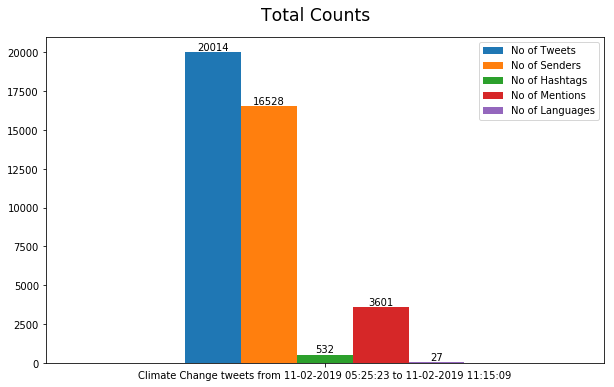

In [9]:
ax=df.plot.bar(figsize=(10,6),rot=0); 
ax.legend(["No of Tweets", "No of Senders","No of Hashtags","No of Mentions","No of Languages"]); 
labels=[st+" tweets from "+mind+" to "+maxd] 
ax.set_xticklabels(labels, rotation=0);
for p in ax.patches:
    ax.annotate("%i" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.suptitle('Total Counts', x=0.5, y=0.95, ha='center', fontsize='xx-large');

In [10]:
print len(mt), "tweets"
print
uh=0
vh=0
for i in range(len(mt)):
    hl=mt.iloc[i]["hashtags_list"]
    if len(hl)==0:
        vh+=1
    else:
        uh+=1
print uh, "tweets without any hashtags"
print "%i tweets with at least one hashtag (%.1f%%)" %(vh, vh*100./len(mt))
print
um=0
vm=0
lum=[]
for i in range(len(mt)):
    ml=mt.iloc[i]["mentions_list"]
    if ml==[]: #len(ml)==0:
        vm+=1
    elif type(ml)==float:
        vm+=1
    else:
        s=mt.iloc[i]["screen_name"]
        lum.append(s)
        um+=1
print vm, "tweets without any mentions"
print "%i tweets with at least one mention (%.1f%%)" %(um, um*100./len(mt))
print len(lum)
print "%i multiple senders in the %i tweets with at least one mention" %(len(lum), um)
print "%i unique senders in the %i tweets with at least one mention" %(len(set(lum)), um)

20014 tweets

1257 tweets without any hashtags
18757 tweets with at least one hashtag (93.7%)

1855 tweets without any mentions
18159 tweets with at least one mention (90.7%)
18159
18159 multiple senders in the 18159 tweets with at least one mention
15056 unique senders in the 18159 tweets with at least one mention


In [11]:
dd={}
dd["hashtags"]=[uh*100./len(mt),vh*100./len(mt)]
dd["mentions"]=[um*100./len(mt),vm*100./len(mt)]
df = pd.DataFrame.from_dict(dd, orient='index').reset_index()
df.rename(columns={'index': 'all_tweets', 0:"Percentage of Tweets without Hashtags/Mentions",1:"Percentage of Tweets with Hashtags/Mentions"}, inplace=True) #/Retweets
df=df.reindex([1, 0]) 
df

,all_tweets,Percentage of Tweets without Hashtags/Mentions,Percentage of Tweets with Hashtags/Mentions
1,hashtags,6.280604,93.719396
0,mentions,90.731488,9.268512


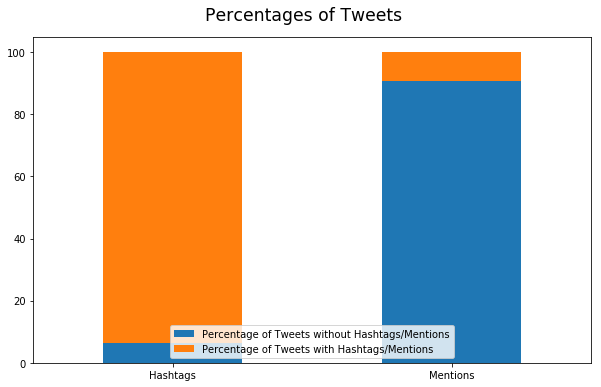

In [12]:
ax=df.plot.bar(stacked=True,figsize=(10,6),rot=0); 
labels=["Hashtags","Mentions"] 
ax.set_xticklabels(labels, rotation=0);
plt.legend(loc=8);
plt.suptitle('Percentages of Tweets', x=0.5, y=0.95, ha='center', fontsize='xx-large');

In [13]:
# mt["mentions_list"]=mmm
mel=[t for t in mt["mentions_list"].tolist() if type(t)!=float]

In [14]:
print len(senders), "senders"
print

uh=0
vh=0
for i in senders:
    df=mt.loc[mt['screen_name'] == i]
    if len(set(flis(df['hashtags_list'].values)))==0:
        uh+=1
    else:
        vh+=1
print uh, "senders without any hashtags"
print "%i senders with at least one hashtag (%.1f%%)" %(vh, vh*100./len(senders))
print "senders without any hashtags + senders with at least one hashtag =", uh+vh
print

mentioned_tweeple=set(flis([t for t in mt["mentions_list"].tolist() if type(t)!=float])) 
mu_mentioned_tweeple=flis([t for t in mt["mentions_list"].tolist() if type(t)!=float])
print len(mu_mentioned_tweeple),"multiple mentioned tweeple"
um=len(senders)-len(mentioned_tweeple.intersection(senders))
print um, "senders without any mentions"
vm=len(mentioned_tweeple.intersection(senders))
print "%i senders with at least one mention (%.1f%%)" %(vm, vm*100./len(senders))
print "senders without any mentions + senders with at least one mention =", len(senders)-len(mentioned_tweeple.intersection(senders)) + vm
lvm=[t for t in mentioned_tweeple if t not in mentioned_tweeple.intersection(senders)]
print len(lvm)
nvm=len(mentioned_tweeple)-len(mentioned_tweeple.intersection(senders))
print nvm, "mentioned tweeple being non-senders"
print vm+len(mentioned_tweeple)-len(mentioned_tweeple.intersection(senders)), "total no of mentioned tweeple (senders with at least one mention + mentioned tweeple being non-senders)"

16528 senders

15386 senders without any hashtags
1142 senders with at least one hashtag (6.9%)
senders without any hashtags + senders with at least one hashtag = 16528

23427 multiple mentioned tweeple
15622 senders without any mentions
906 senders with at least one mention (5.5%)
senders without any mentions + senders with at least one mention = 16528
2695
2695 mentioned tweeple being non-senders
3601 total no of mentioned tweeple (senders with at least one mention + mentioned tweeple being non-senders)


In [15]:
dd={}
dd["hashtags"]=[uh*100./len(senders),vh*100./len(senders)]
dd["mentions"]=[um*100./len(senders),vm*100./len(senders)]
df = pd.DataFrame.from_dict(dd, orient='index').reset_index()
df.rename(columns={'index': 'all_senders', 0:"Percentage of Senders without Hashtags/Mentions",1:"Percentage of Senders with Hashtags/Mentions"}, inplace=True) #/Retweets
df=df.reindex([1, 0])  
df    

,all_senders,Percentage of Senders without Hashtags/Mentions,Percentage of Senders with Hashtags/Mentions
1,hashtags,93.090513,6.909487
0,mentions,94.518393,5.481607


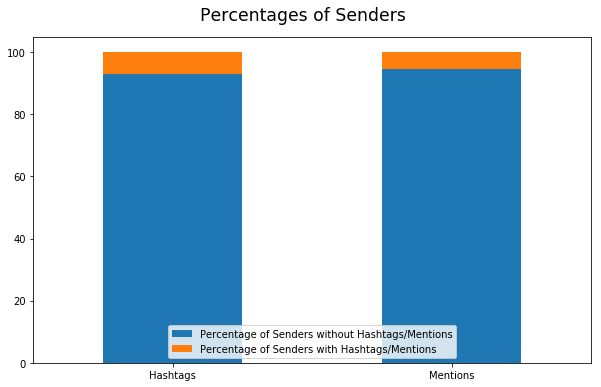

In [16]:
ax=df.plot.bar(stacked=True,figsize=(10,6),rot=0); 
labels=["Hashtags","Mentions"] 
ax.set_xticklabels(labels, rotation=0);
plt.legend(loc=8);
# x=0.5, y=1.05,
plt.suptitle('Percentages of Senders', x=0.5, y=0.95, ha='center', fontsize='xx-large');

In [17]:
dd={}
dd["Tweeple"]=[len(senders),nvm] #,nvr]
# len(set([u for u in exsm if u not in senders])),len(set([u for u in exsr if u not in senders]))]
df = pd.DataFrame.from_dict(dd, orient='index').reset_index()
df.rename(columns={'index': 'Tweeple', 0: 'Tweeting Senders',1:"Mentioned Tweeple"}, inplace=True) #,2:"Retweeted Tweeple"
df

,Tweeple,Tweeting Senders,Mentioned Tweeple
0,Tweeple,16528,2695


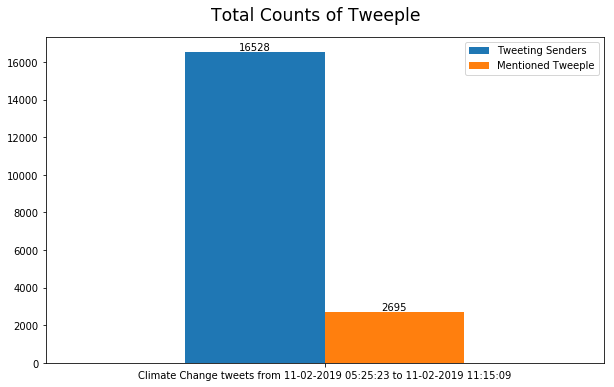

In [18]:
ax=df.plot.bar(figsize=(10,6),rot=0); 
ax.legend(["Tweeting Senders", "Mentioned Tweeple"]) 
labels=[st+" tweets from "+mind+" to "+maxd] 
ax.set_xticklabels(labels, rotation=0);
for p in ax.patches:
    ax.annotate("%i" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.suptitle('Total Counts of Tweeple', x=0.5, y=0.95, ha='center', fontsize='xx-large');

In [19]:
lmt=mt["lang"].tolist()
print "The most common languages are the following", len(sorted(set(lmt)))
for i in sorted(set(lmt)):
    print i
x=Counter(mt["lang"].tolist())
x=x.most_common()
x

The most common languages are the following 27
ar
cs
da
de
el
en
es
fa
fi
fr
ht
in
it
ja
ko
ml
ne
nl
pl
pt
ro
ru
sv
th
tl
und
zh


[(u'en', 19572),
 (u'und', 253),
 (u'fr', 61),
 (u'nl', 32),
 (u'de', 15),
 (u'ja', 11),
 (u'ar', 10),
 (u'es', 9),
 (u'sv', 6),
 (u'it', 5),
 (u'th', 5),
 (u'da', 5),
 (u'in', 4),
 (u'tl', 4),
 (u'ro', 4),
 (u'cs', 2),
 (u'ru', 2),
 (u'pt', 2),
 (u'ht', 2),
 (u'fa', 2),
 (u'fi', 2),
 (u'el', 1),
 (u'zh', 1),
 (u'ne', 1),
 (u'pl', 1),
 (u'ml', 1),
 (u'ko', 1)]

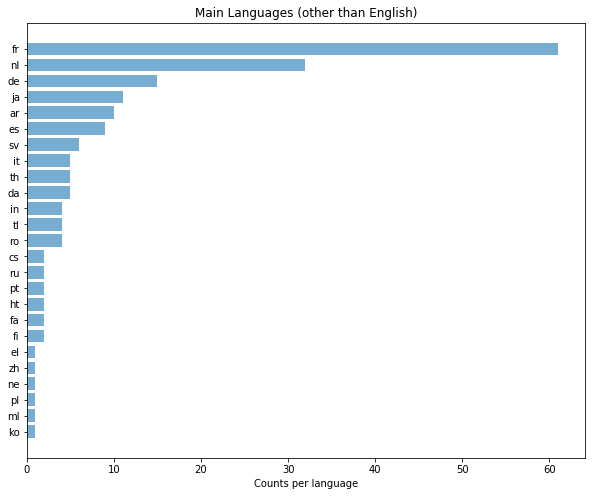

In [20]:
x=x[2:]
keys = [i for (i,j) in x] 
y_pos = np.arange(len(keys))
performance = [j for (i,j) in x] 
plt.figure(figsize=(10,8))
ax = plt.axes()
plt.barh(y_pos, performance, align='center', alpha=0.6) 
ax.invert_yaxis()
plt.yticks(y_pos, keys)
plt.xlabel('Counts per language')
plt.title('Main Languages (other than English)')
plt.show()

In [21]:
mhashtags=[i for sl in [mt["hashtags_list"].tolist()[i] for i in range(len(mt))] for i in sl]
x=Counter(mhashtags)
x=x.most_common()
xx=[(i,j) for (i,j) in x if j>15] # if j>4]
xx

[(u'climatechange', 240),
 (u'climate', 71),
 (u'fridaysforfuture', 52),
 (u'climatestrike', 49),
 (u'greennewdeal', 44),
 (u'plant4pakistan', 36),
 (u'r4today', 35),
 (u'auspol', 35),
 (u'nswvotes', 22),
 (u'climateaction', 21),
 (u'climateemergency', 20),
 (u'meatfreemonday', 19),
 (u'science', 19),
 (u'worldgovsummit', 17),
 (u'qanda', 16)]

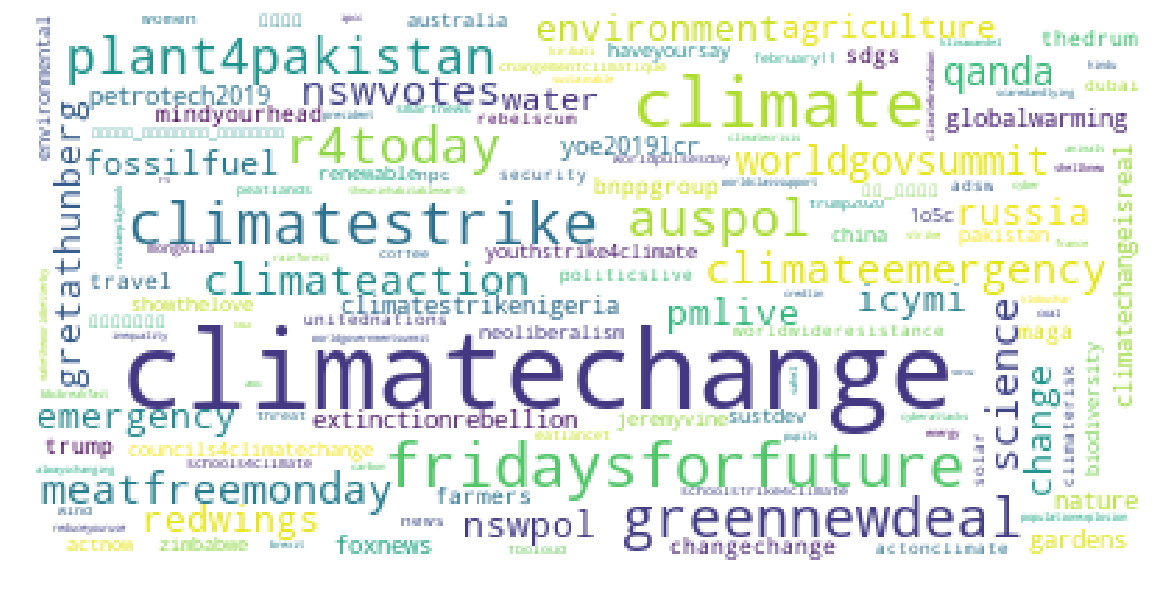

In [22]:
t=[]
for (i,j) in x:
    for k in range(j):
        t.append(i)
tt=' '.join(t)
wordcloud = WordCloud(collocations=False,background_color="white").generate(tt) #,width=200, height=200
fig = plt.figure(figsize=(20,20))
plt.imshow(wordcloud);
plt.axis("off");

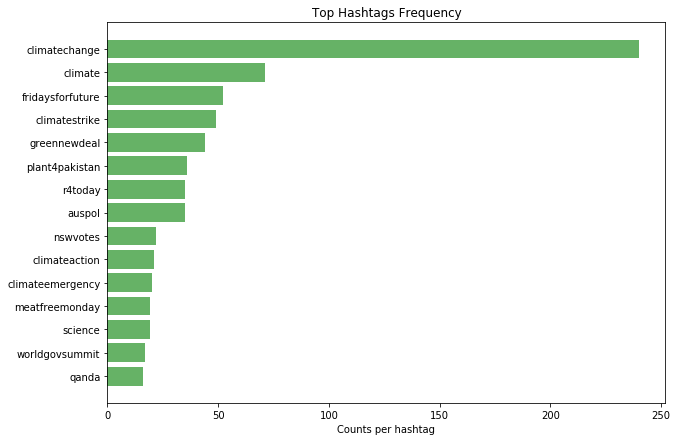

In [23]:
keys = [i for (i,j) in xx] #x.keys()
y_pos = np.arange(len(keys))
performance = [j for (i,j) in xx] #[x[k] for k in keys]
plt.figure(figsize=(10,7))
ax = plt.axes()
plt.barh(y_pos, performance, align='center', color="g",alpha=0.6) #xerr=error, 
ax.invert_yaxis()
plt.yticks(y_pos, keys)
plt.xlabel('Counts per hashtag')
plt.title('Top Hashtags Frequency')
plt.show()

## 2. Timeseries of Tweets, Teeple, Hashtags & Mentions

In [24]:
time = [item.split(" ")[3] for item in mt['created_at'].values] 
hour = [item.split(":")[0] for item in time]
mt['time'] = hour
mt

,twitter_id,created_at,screen_name,hashtags_list,mentions_list,lang,text,date,time
17818,1094829732741500929,Mon Feb 11 05:25:23 +0000 2019,dailymorgasm,[],"[amyklobuchar, realDonaldTrump]",en,"RT @amyklobuchar: Science is on my side, @real...",2019-02-11 05:25:23,05
17819,1094829732678549504,Mon Feb 11 05:25:23 +0000 2019,CVictorsen,[],[RBReich],en,RT @RBReich: The 3 biggest threats to our surv...,2019-02-11 05:25:23,05
17820,1094829731311177728,Mon Feb 11 05:25:23 +0000 2019,darksideofcode,[],NaN,en,"As the Planet Warms, Who Should Get to Drive? ...",2019-02-11 05:25:23,05
17817,1094829734461169664,Mon Feb 11 05:25:24 +0000 2019,NewsOfMideast,[],[RBReich],en,RT @RBReich: The 3 biggest threats to our surv...,2019-02-11 05:25:24,05
17815,1094829739338944512,Mon Feb 11 05:25:25 +0000 2019,SistahSHE,[],NaN,en,Of course corrupt Con-man Trump denies Climate...,2019-02-11 05:25:25,05
17816,1094829738479124480,Mon Feb 11 05:25:25 +0000 2019,trudyg007,[],[Scottludlam],en,RT @Scottludlam: put down the dildo and do som...,2019-02-11 05:25:25,05
17814,1094829742421766144,Mon Feb 11 05:25:26 +0000 2019,cestquica,[],[RBReich],en,RT @RBReich: The 3 biggest threats to our surv...,2019-02-11 05:25:26,05
17811,1094829748604280832,Mon Feb 11 05:25:27 +0000 2019,kharal_saif,[],[PTIofficial],en,RT @PTIofficial: You only lose when you give u...,2019-02-11 05:25:27,05
17813,1094829745798348800,Mon Feb 11 05:25:27 +0000 2019,newsycbot,[],NaN,en,"As the Planet Warms, Who Should Get to Drive? ...",2019-02-11 05:25:27,05
17812,1094829747316523008,Mon Feb 11 05:25:27 +0000 2019,MekongEye,[],NaN,en,Navigating coverage of climate change and agri...,2019-02-11 05:25:27,05


In [25]:
# hhd={}
# for h in set(mt.time.values):
#     df=mt.loc[mt['time'] == h]
#     t=[]
#     for i in range(len(df)):
#         for ht in df.hashtags_list.values:
#             if ht not in t:
#                 t.append(ht)
#     hhd[h]=len(t)
hhd={u'05': 53,
 u'06': 105,
 u'07': 95,
 u'08': 104,
 u'09': 116,
 u'10': 119,
 u'11': 43}
hashtags_per_hour=pd.DataFrame(hhd.items(), columns=['hour', 'Number_of_hashtags'])
hashtags_per_hour.sort_values(by='hour')

,hour,Number_of_hashtags
4,05,53
2,06,105
3,07,95
5,08,104
6,09,116
1,10,119
0,11,43


In [26]:
# mhd={}
# for h in set(mt.time.values):
#     df=mt.loc[mt['time'] == h]
#     t=[]
#     for i in range(len(df)):
#         for ht in df.mentions_list.values:
#             if ht not in t:
#                 t.append(ht)
#     mhd[h]=len(t)
mhd={u'05': 695,
 u'06': 992,
 u'07': 987,
 u'08': 1131,
 u'09': 1121,
 u'10': 1091,
 u'11': 383}
mentions_per_hour=pd.DataFrame(mhd.items(), columns=['hour', 'Number_of_mentions'])
mentions_per_hour.sort_values(by='hour')

,hour,Number_of_mentions
4,05,695
2,06,992
3,07,987
5,08,1131
6,09,1121
1,10,1091
0,11,383


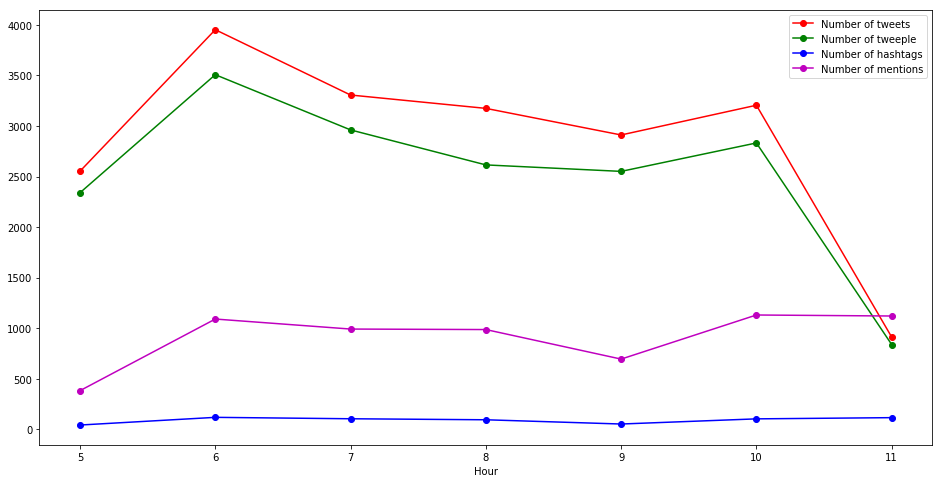

In [27]:
tweets_per_hour = mt[['time', 'created_at']].groupby('time').count()
tweets_per_hour=tweets_per_hour.rename(columns={"created_at": "Number_of_tweets",'time':'hour'})
tweets_per_hour['hour']=tweets_per_hour.index
X=[int(x) for x in tweets_per_hour['hour'].tolist()]
Y=tweets_per_hour['Number_of_tweets'].tolist()

tweeple_per_hour = mt[['time', 'screen_name']].groupby('time').nunique()
tweeple_per_hour=tweeple_per_hour.rename(columns={"screen_name": "Number_of_tweeple",'time':'hour'})
tweeple_per_hour['hour']=tweeple_per_hour.index
Z=tweeple_per_hour['Number_of_tweeple'].tolist()

hashtags_per_hour['hour']=hashtags_per_hour.index
U=hashtags_per_hour['Number_of_hashtags'].tolist()

mentions_per_hour['hour']=mentions_per_hour.index
W=mentions_per_hour['Number_of_mentions'].tolist()

plt.figure(figsize=(16,8))
plt.plot(X,Y, "ro-",label='Number of tweets'); 
plt.plot(X,Z, "go-",label='Number of tweeple'); 
plt.plot(X,U, "bo-",label='Number of hashtags'); 
plt.plot(X,W, "mo-",label='Number of mentions'); 
plt.legend(loc='upper right');
plt.xlabel("Hour");

## 3. Graph of Co-Occurring Hashtags

In [28]:
heds=[]
for i in range(len(mt)):
    iterable=mt.iloc[i]['hashtags_list']
    if type(iterable)!=float:
        if len(iterable)>1:
            for j in itertools.combinations(iterable, 2):
                heds.append((j[0],j[1],mt.iloc[i]['date']))
print "Number of multi-hashtag-cooccurrences:"
print "%i nonunique (%i unique)" %(len(heds),len(set(heds)))

Number of multi-hashtag-cooccurrences:
1073 nonunique (1072 unique)


In [29]:
G=nx.MultiGraph()
for k,v in dict(Counter(heds)).items():
    G.add_edge(k[0],k[1],date=k[2])
print len(G.nodes()),len(G.edges())
if nx.is_connected(G)==True:
    print "This multigraph is connected"
else:
    print "This multigraph is not connected and has", nx.number_connected_components(G), "connected components"
Gl = sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
Gc=G.subgraph(Gl[0])
print 'The largest connected component has:'
print "%i nodes and %i edges" %(len(Gc.nodes()), len(Gc.edges()))

355 1072
This multigraph is not connected and has 56 connected components
The largest connected component has:
211 nodes and 843 edges


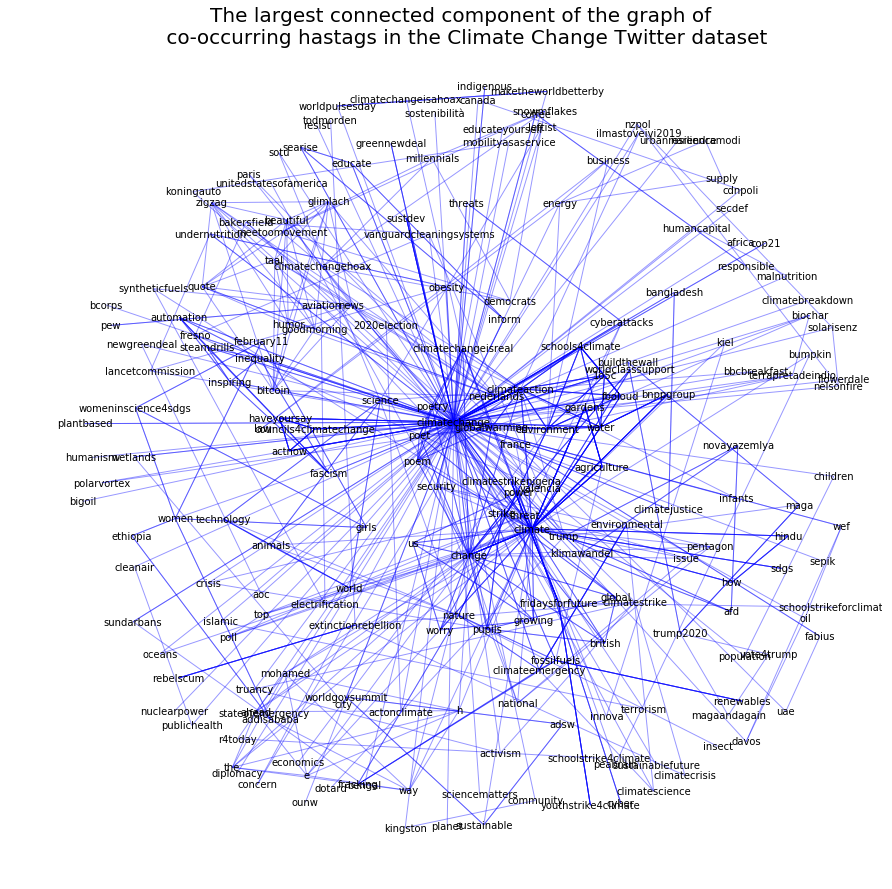

In [30]:
pos=nx.spring_layout(Gc,k=0.7) #graphviz_layout(Gc)
plt.figure(figsize=(15,15));
nodes = nx.draw_networkx_nodes(Gc, pos,node_size=0, node_color="g", alpha=0.3)
nx.draw_networkx_edges(Gc, pos,arrowsize=20, edge_color="b", alpha=0.4)
nx.draw_networkx_labels(Gc, pos,font_size=10)
plt.axis('off');
sst="The largest connected component of the graph of \n co-occurring hastags in the %s Twitter dataset" %st
plt.title(sst,fontsize=20);

## 4. Graph of Mention-ing/-ed Tweeple

In [31]:
meds=[]
for i in range(len(mt)):
    iterable=mt.iloc[i]['mentions_list']
    if type(iterable)!=float:
        for k in iterable:
            meds.append((mt.iloc[i]['screen_name'],k,mt.iloc[i]['date']))
print "Number of multi-mentions among tweeple:"
print "%i nonunique (%i unique)" %(len(meds),len(set(meds)))

Number of multi-mentions among tweeple:
23427 nonunique (23396 unique)


In [32]:
G=nx.MultiDiGraph()
for k,v in dict(Counter(meds)).items():
    G.add_edge(k[0],k[1],date=k[2])
print len(G.nodes()),len(G.edges())
if nx.is_weakly_connected(G)==True:
    print "This multigraph is weakly connected"
else:
    print "This multigraph is not weakly connected and has", nx.number_weakly_connected_components(G), "weakly connected components"
Gl = sorted(nx.weakly_connected_component_subgraphs(G), key = len, reverse=True)
# for i in range(len(Gl)):
#     if len(Gl[i].nodes())<70 and len(Gl[i].nodes())>20:
#         print i
Gc=G.subgraph(Gl[0])
print 'The largest weakly connected component has:'
print "%i nodes and %i edges" %(len(Gc.nodes()), len(Gc.edges()))

18087 23396
This multigraph is not weakly connected and has 1113 weakly connected components
The largest weakly connected component has:
14470 nodes and 20493 edges


In [33]:
# pos=nx.spring_layout(Gc,k=0.7) #graphviz_layout(Gc)
# plt.figure(figsize=(15,15));
# nodes = nx.draw_networkx_nodes(Gc, pos,node_size=0, node_color="g", alpha=0.3)
# nx.draw_networkx_edges(Gc, pos,arrowsize=20, edge_color="r", alpha=0.4)
# # nx.draw_networkx_labels(Gc, pos,font_size=10)
# plt.axis('off');
# sst="The largest weakly connected component of the graph of \n mention-ing/-ed tweeple in the %s Twitter dataset" %st
# plt.title(sst,fontsize=20);

In [34]:
Gc=G.subgraph(Gl[4])
print 'The fifth largest weakly connected component has:'
print "%i nodes and %i edges" %(len(Gc.nodes()), len(Gc.edges()))

The fifth largest weakly connected component has:
34 nodes and 39 edges


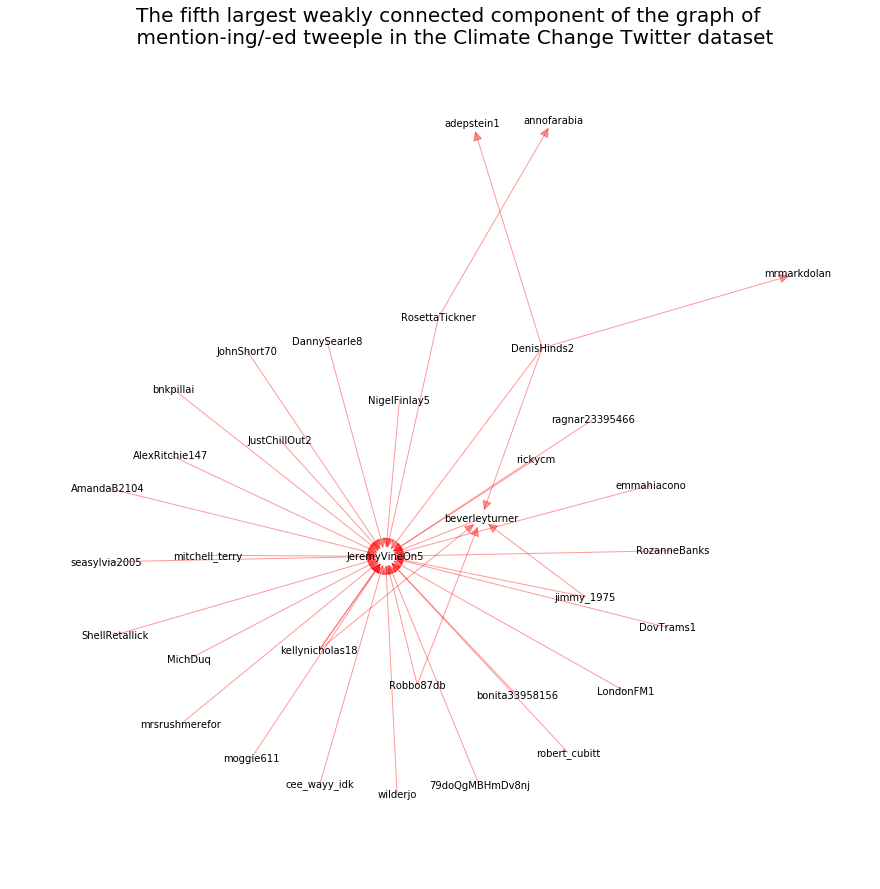

In [35]:
pos=graphviz_layout(Gc)
plt.figure(figsize=(15,15));
nodes = nx.draw_networkx_nodes(Gc, pos,node_size=0, node_color="g", alpha=0.3)
nx.draw_networkx_edges(Gc, pos,arrowsize=20, edge_color="r", alpha=0.4)
nx.draw_networkx_labels(Gc, pos,font_size=10)
plt.axis('off');
sst="The fifth largest weakly connected component of the graph of \n mention-ing/-ed tweeple in the %s Twitter dataset" %st
plt.title(sst,fontsize=20);